<a href="https://colab.research.google.com/github/hirokimituya/book_stock-price-analysis/blob/main/ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader(f'{code}.JP', 'stooq').sort_index()
  return df

In [6]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 5.6 MB/s eta 0:00:00


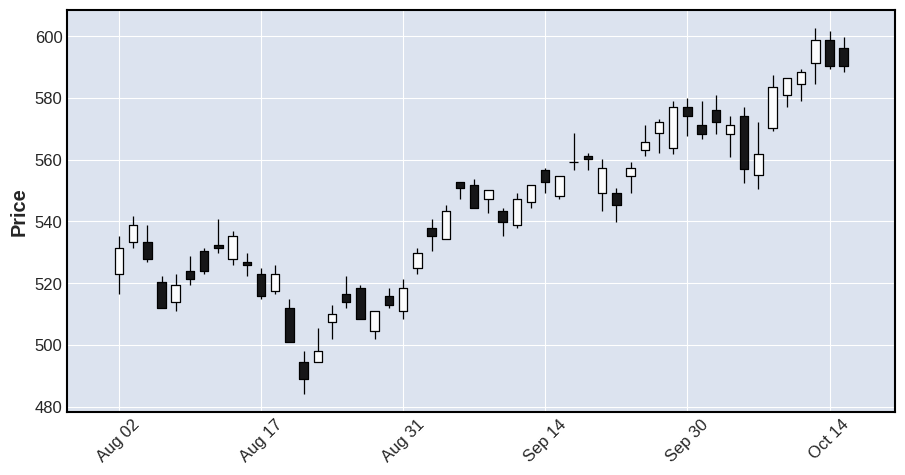

In [7]:
import mplfinance as mpf
import datetime as dt

df = get_stock_data(4902)   # コニカルノルタ
rdf = df[dt.datetime(2021, 8, 1):dt.datetime(2021, 10, 15)]
mpf.plot(rdf, type='candle', figratio=(2, 1))

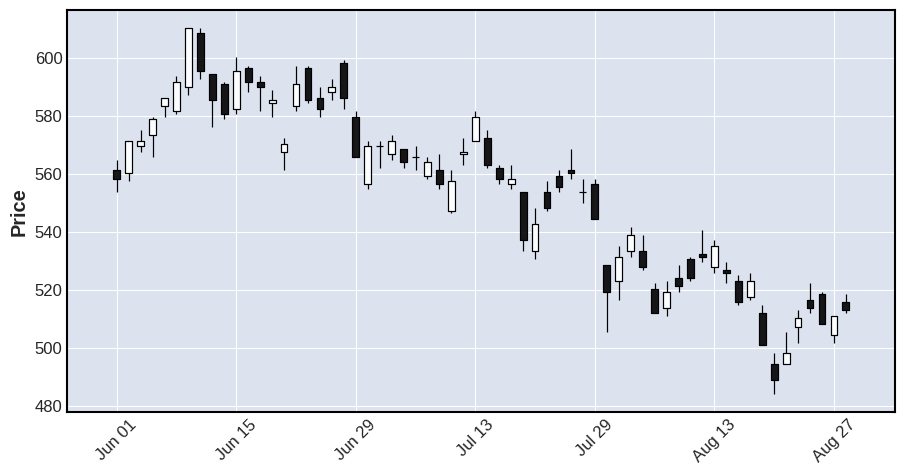

In [9]:
rdf = df[dt.datetime(2021, 6, 1):dt.datetime(2021, 8, 30)]
mpf.plot(rdf, type='candle', figratio=(2, 1))

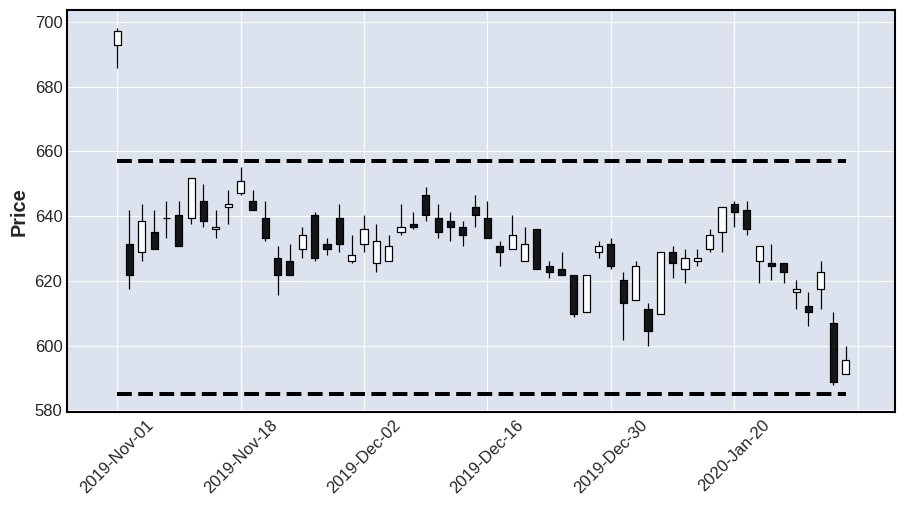

In [28]:
import pandas as pd
import numpy as np

rdf = df[dt.datetime(2019, 11, 1):dt.datetime(2020, 1, 31)]
top_series = pd.Series([657] * len(rdf.index), index=rdf.index)
bottom_series = pd.Series([585] * len(rdf.index), index=rdf.index)
apd = [ 
    mpf.make_addplot(top_series, color='black', linestyle='--'), 
    mpf.make_addplot(bottom_series, color='black', linestyle='--')
]
mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd)

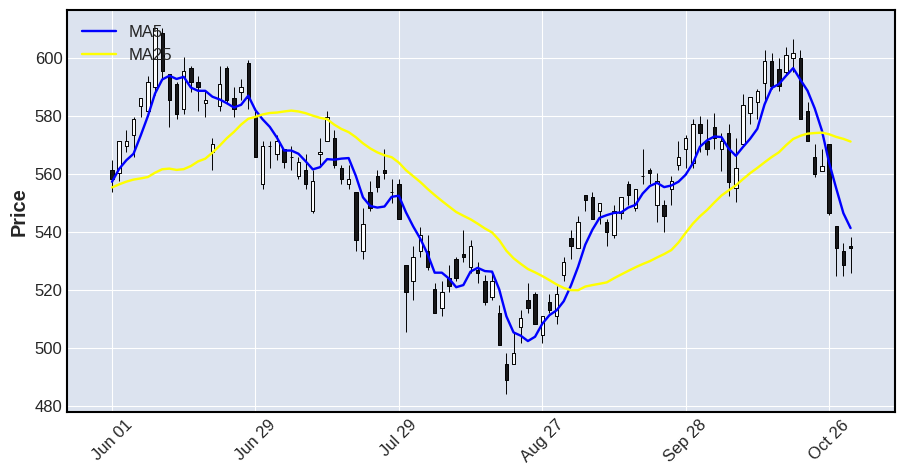

In [34]:
ma_dict = {5: 'blue', 25: 'yellow'}
for n in ma_dict:
    df[f'ma{n}'] = df['Close'].rolling(window=n).mean()


rdf = df[dt.datetime(2021, 6, 1):dt.datetime(2021, 10, 31)]
apd = [mpf.make_addplot(rdf[f'ma{n}'], color=color) for n, color in ma_dict.items()]
fig, axes = mpf.plot(rdf, type='candle', figratio=(2, 1), addplot=apd, returnfig=True)
axes[0].legend(['MA5', 'MA25'])
fig.show()